# COVID-19 Dashboard
### NHS Region: London 
#### Overview of hospital cases, new admissions and transmission growth rate

The figures and tables of this dashboard are meant to show the daily number of COVID-19 hospital cases, new admissions of new admissions and the mininimum/maximum transmission growth rate from the NHS region of London from March 2020 to October 2021. Data was extracted from the [NHS dashboard](https://coronavirus.data.gov.uk/) on 27/10/2021.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
# an iPython  "magic" that enables the embedding of matplotlib output
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 120

#### Loading the data and data preprocessing

In [3]:
with open("region_nhs_london.json", "rt") as INFILE:
    data=json.load(INFILE)

In [4]:
datalist=data['body']
dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()
# dates

In [5]:
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

In [6]:
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
# print (startdate, ' to ', enddate)

#### Creating time series data frame

In [7]:
index=pd.date_range(startdate, enddate, freq='D')
timeseriesdf=pd.DataFrame(index=index, columns=['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax', 'transmissionRateGrowthRateMin'])
timeseriesdf.head(3)

,hospitalCases,newAdmissions,transmissionRateGrowthRateMax,transmissionRateGrowthRateMin
2020-03-19,NaN,NaN,NaN,NaN
2020-03-20,NaN,NaN,NaN,NaN
2020-03-21,NaN,NaN,NaN,NaN


#### Adding the data from the json to the time series data frame

In [8]:
for entry in datalist: # each entry is a dictionary with date, cases, hospital and deaths
    date=parse_date(entry['date'])
    for column in ['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax', 'transmissionRateGrowthRateMin']:
        # check that nothing is there yet - just in case some dates are duplicated,
        # maybe with data for different columns in each entry
        if pd.isna(timeseriesdf.loc[date, column]): 
            # replace None with 0 in our data 
            value= float(entry[column]) if entry[column]!=None else 0.0
            # this is the way you access a specific location in the dataframe - use .loc
            # and put index,column in a single set of [ ]
            timeseriesdf.loc[date, column]=value
            
# fill in any remaining "holes" due to missing dates
timeseriesdf.fillna(0.0, inplace=True)
       

timeseriesdf.head()

,hospitalCases,newAdmissions,transmissionRateGrowthRateMax,transmissionRateGrowthRateMin
2020-03-19,0.0,240.0,0.0,0.0
2020-03-20,841.0,272.0,0.0,0.0
2020-03-21,1081.0,311.0,0.0,0.0
2020-03-22,1266.0,335.0,0.0,0.0
2020-03-23,1559.0,505.0,0.0,0.0


In [9]:
timeseriesdf ['newAdmissions']

2020-03-19    240.0
2020-03-20    272.0
2020-03-21    311.0
2020-03-22    335.0
2020-03-23    505.0
              ...  
2021-10-22    109.0
2021-10-23     93.0
2021-10-24     96.0
2021-10-25      0.0
2021-10-26      0.0
Freq: D, Name: newAdmissions, Length: 587, dtype: float64

In [10]:
startdate

Timestamp('2020-03-19 00:00:00')

 ## Plot of Hospital Cases, New Admissions and Transmission Growth Rates

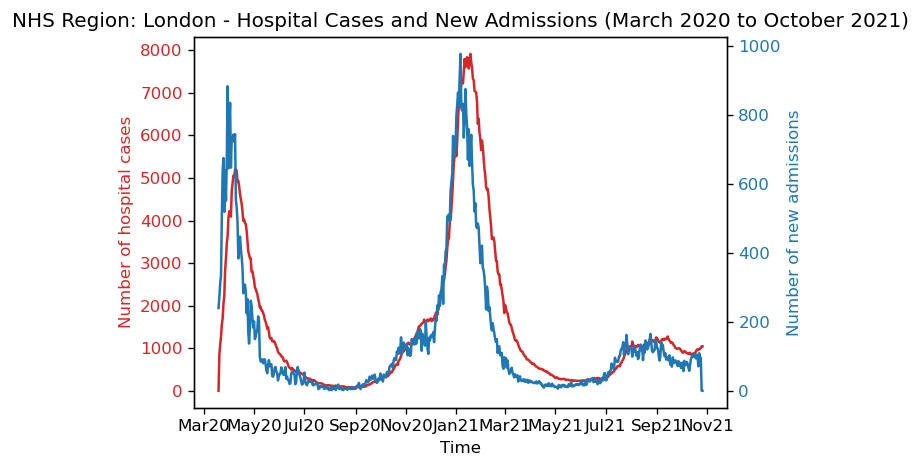

In [11]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%b%y')

data1 = timeseriesdf['hospitalCases']
data2 = timeseriesdf['newAdmissions']

fig, ax1 = plt.subplots()
plt.title("NHS Region: London - Hospital Cases and New Admissions (March 2020 to October 2021)")
color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Number of hospital cases', color=color)
ax1.plot(data1, color=color)
ax1.xaxis.set_major_formatter(myFmt)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Number of new admissions', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.xaxis.set_major_formatter(myFmt)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

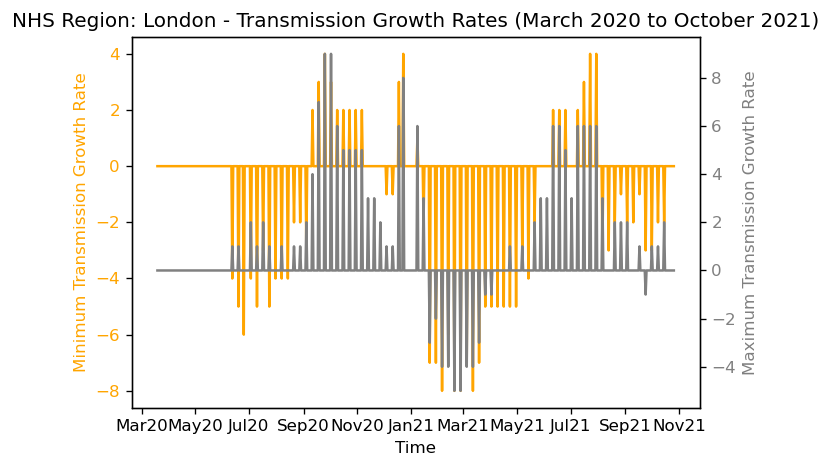

In [12]:
data1 = timeseriesdf ['transmissionRateGrowthRateMin']
data2 = timeseriesdf ['transmissionRateGrowthRateMax']

import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%b%y')

data1 = timeseriesdf['transmissionRateGrowthRateMin']
data2 = timeseriesdf['transmissionRateGrowthRateMax']

fig, ax1 = plt.subplots()
plt.title("NHS Region: London - Transmission Growth Rates (March 2020 to October 2021)")
color = 'orange'
ax1.set_xlabel('Time')
ax1.set_ylabel('Minimum Transmission Growth Rate', color=color)
ax1.plot(data1, color=color)
ax1.xaxis.set_major_formatter(myFmt)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'grey'
ax2.set_ylabel('Maximum Transmission Growth Rate', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.xaxis.set_major_formatter(myFmt)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [13]:
# timeseriesdf.plot(logy=True)

## Interactive Graphs

#### Create pickle object for interactive graphs

In [14]:
timeseriesdf.to_pickle("timeseriesdf.pkl")

In [15]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 120

In [17]:
# our API access function. This will be called by the button when it is clicked
def access_api(button):
    # Ignore the button parameter
    #
    # put code for polling the API here
    #
    # after all is done, you can switch the icon on the button to a "check" sign
    # and optionally disable the button - it won't be needed again.
    apibutton.icon="check"
    apibutton.disabled=True

# see the doc for the parameters    
apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to download current Public Health England data',
    icon='download' # (FontAwesome names without the `fa-` prefix)
)

# register the callback function with the button
apibutton.on_click(access_api)

# this is an iPython function that generalises print for Jupyter Notebooks; we use it to 
# display the widgets
display(apibutton)

Button(description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Click to download current Pu…

#### Read in data from pickle object

In [18]:
timeseriesdf=pd.read_pickle("timeseriesdf.pkl")

In [19]:
timeseriesdf.head(5)

,hospitalCases,newAdmissions,transmissionRateGrowthRateMax,transmissionRateGrowthRateMin
2020-03-19,0.0,240.0,0.0,0.0
2020-03-20,841.0,272.0,0.0,0.0
2020-03-21,1081.0,311.0,0.0,0.0
2020-03-22,1266.0,335.0,0.0,0.0
2020-03-23,1559.0,505.0,0.0,0.0


In [20]:
series=wdg.SelectMultiple(
    options=['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax', 'transmissionRateGrowthRateMin'],
    value=['hospitalCases', 'newAdmissions'],
    rows=3,
    description='Stats:',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Scale:',
    disabled=False
)

# try replacing HBox with a VBox
controls=wdg.HBox([series, scale])

def timeseries_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        timeseriesdf[list(gcols)].plot(logy=logscale)
        plt.show() # important - graphs won't update if this is missing 
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

# keep calling timeseries_graph(gcols=value_of_series, gscale=value_of_scale); 
# capture output in widget graph   
graph=wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

Output()

### Drop down interactive Graph and Button Configuration

In [21]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

In [22]:
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

In [23]:
with open("region_nhs_london.json", "rt") as INFILE:
    jsondata =json.load(INFILE) 

In [24]:
def wrangle_data(rawdata):
    """ Parameters: rawdata - data from json file or API call. Returns a dataframe.
    Edit to include the code that wrangles the data, creates the dataframe and fills it in. """
    
    datalist=rawdata['body']

    index=pd.date_range(startdate, enddate, freq='D')
    timeseriesdf=pd.DataFrame(index=index, columns=['hospitalCases', 'newAdmissions', 
                                                    'transmissionRateGrowthRateMax', 'transmissionRateGrowthRateMin'])
    
    for entry in datalist: # each entry is a dictionary with date, cases, hospital and deaths
        date=parse_date(entry['date'])
        for column in ['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax', 'transmissionRateGrowthRateMin']:
            if pd.isna(timeseriesdf.loc[date, column]): 
                # replace None with 0 in our data 
                value= float(entry[column]) if entry[column]!=None else 0.0
                # this is the way you access a specific location in the dataframe - use .loc
                # and put index,column in a single set of [ ]
                timeseriesdf.loc[date, column]=value  
                
    # fill in any remaining "holes" due to missing dates
    timeseriesdf.fillna(0.0, inplace=True)
    return timeseriesdf

# putting the wrangling code into a function allows you to call it again after refreshing the data through 
# the API. You should call the function directly on the JSON data when the dashboard starts, by including 
# the call in the cell as below:
df=wrangle_data(jsondata) # df is the dataframe for plotting

In [25]:
# Place your API access code in this function. Do not call this function directly; it will be called by 
# the button callback. 
def access_api():
    """ Accesses the PHE API. Returns raw data in the same format as data loaded from the "canned" JSON file. """
    return {} # return data read from the API

# Printout from this function will be lost in Voila unless captured in an
# output widget - therefore, we give feedback to the user by changing the 
# appearance of the button
def api_button_callback(button):
    """ Button callback - it must take the button as its parameter (unused in this case).
    Accesses API, wrangles data, updates global variable df used for plotting. """
    # Get fresh data from the API. If you have time, include some error handling
    # around this call.
    apidata=access_api()
    # wrangle the data and overwrite the dataframe for plotting
    #global df
    df=wrangle_data(apidata)
    # the graph won't refresh until the user interacts with the widget.
    # this function simulates the interaction, see Graph and Analysis below.
    # you can omit this step in the first instance
    refresh_graph()
    # after all is done, you can switch the icon on the button to a "check" sign
    # and optionally disable the button - it won't be needed again. You can use icons
    # "unlink" or "times" and change the button text to "Unavailable" in case the 
    # api call fails.
    apibutton.icon="check"
    apibutton.disabled=True

    
apibutton=wdg.Button(
    description='Refresh Button', # you may want to change this...
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip="Keep calm and carry on",
    # FontAwesome names without the `fa-` prefix - try "download"
    icon='download'
)

# remember to register your button callback function with the button
apibutton.on_click(api_button_callback) # the name of your function inside these brackets

display(apibutton)

# run all cells before clicking on this button

Button(description='Refresh Button', icon='download', style=ButtonStyle(), tooltip='Keep calm and carry on')

In [26]:
def plot_random_walk(walk):
    df[walk].plot()
    plt.show() # important! update won't work properly without this
    
whichwalk=wdg.Dropdown(
    options=['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax', 'transmissionRateGrowthRateMin'],
    value='hospitalCases',
    description='Plot of: ',
    disabled=False,
)

def refresh_graph():
    """ We change the value of the widget in order to force a redraw of the graph;
    this is useful when the data have been updated. This is a bit of a gimmick; it
    needs to be customised for one of your widgets. """
    current=whichwalk.value
    if current==whichwalk.options[0]:
        other=whichwalk.options[1]
    else:
        other=whichwalk.options[0]
    whichwalk.value=other # forces the redraw
    whichwalk.value=current # now we can change it back

In [27]:
graph=wdg.interactive_output(plot_random_walk, {'walk': whichwalk})
    
display(whichwalk, graph)

Dropdown(description='Plot of: ', options=('hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax', …

Output()

In [29]:
whichwalk

Dropdown(description='Plot of: ', options=('hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax', …